# Import libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import os
import cv2
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Lambda # Convolution Layers
from tensorflow.keras.layers import Dense, Dropout, Flatten # Core Layers
from tensorflow.keras.layers import BatchNormalization
import warnings
warnings.simplefilter("ignore")

# Load .npy file

In [3]:
# Kiad the MNIST data from .npy file
data = np.load('data/mnist_data.npy', allow_pickle=True)
images = data.item().get('images')
labels = data.item().get('labels')

# Visualize

In [4]:
import random

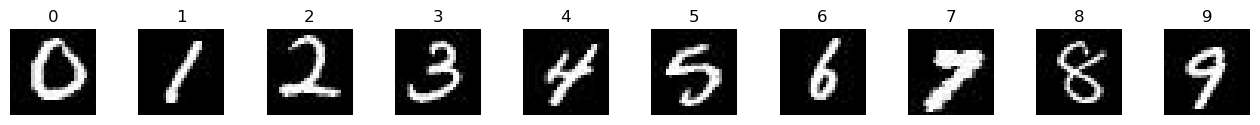

In [7]:
def random_value_for_index(labels, target_values):
    indices = [index for index, value in enumerate(labels) if value == target_values]
    return random.choice(indices)

# define categories
categories= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Create subplots
fig, axs = plt.subplots(1, 10, figsize=(16, 16))

for index, category in enumerate(categories):
    # Select random image index from specific category
    random_index = random_value_for_index(labels, category)
    # Plot the random image
    axs[index].imshow(images[random_index].reshape(28, 28), cmap='gray')
    axs[index].axis('off')
    axs[index].set_title(category)

plt.subplots_adjust(wspace=0.5, hspace=0.1)
plt.show()

# Train Test Split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=11)

In [9]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [10]:
x_train_reshaped = x_train.reshape((-1,28, 28,1))
x_test_reshaped = x_test.reshape((-1,28,28,1))

In [11]:
print("X_train shape : ",x_train_reshaped.shape)
print("y_train shape : ",y_train.shape)
print("X_test shape : ",x_test_reshaped.shape)
print("y_test shape : ",y_test.shape)

X_train shape :  (33600, 28, 28, 1)
y_train shape :  (33600,)
X_test shape :  (8400, 28, 28, 1)
y_test shape :  (8400,)


# Train the CNN Model

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [13]:
model = Sequential()

model.add(Conv2D(filters= 64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters= 64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 5, 5, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,469,002 (13.23 MB)

 Trainable params: 3,468,362 (13.23 MB)

 Non-trainable params: 640 (2.50 KB)

# Early Stopping

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_accuracy',patience=5)

# Compile

In [16]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train

In [17]:
history = model.fit(x_train_reshaped, y_train, epochs=20, batch_size=32, validation_split=0.3,callbacks=[early_stop])

Epoch 1/20
735/735 ━━━━━━━━━━━━━━━━━━━━ 53s 70ms/step - accuracy: 0.9078 - loss: 0.2966 - val_accuracy: 0.9594 - val_loss: 0.1344
Epoch 2/20
735/735 ━━━━━━━━━━━━━━━━━━━━ 81s 69ms/step - accuracy: 0.9853 - loss: 0.0503 - val_accuracy: 0.9808 - val_loss: 0.0634
Epoch 3/20
735/735 ━━━━━━━━━━━━━━━━━━━━ 48s 65ms/step - accuracy: 0.9933 - loss: 0.0260 - val_accuracy: 0.9805 - val_loss: 0.0600
Epoch 4/20
735/735 ━━━━━━━━━━━━━━━━━━━━ 47s 63ms/step - accuracy: 0.9955 - loss: 0.0183 - val_accuracy: 0.9847 - val_loss: 0.0477
Epoch 5/20
735/735 ━━━━━━━━━━━━━━━━━━━━ 45s 62ms/step - accuracy: 0.9983 - loss: 0.0106 - val_accuracy: 0.9851 - val_loss: 0.0459
Epoch 6/20
735/735 ━━━━━━━━━━━━━━━━━━━━ 36s 49ms/step - accuracy: 0.9994 - loss: 0.0078 - val_accuracy: 0.9866 - val_loss: 0.0431
Epoch 7/20
735/735 ━━━━━━━━━━━━━━━━━━━━ 29s 39ms/step - accuracy: 0.9998 - loss: 0.0057 - val_accuracy: 0.9858 - val_loss: 0.0442
Epoch 8/20
735/735 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.9997 - loss: 0.0052 - 

# Metrics

In [20]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

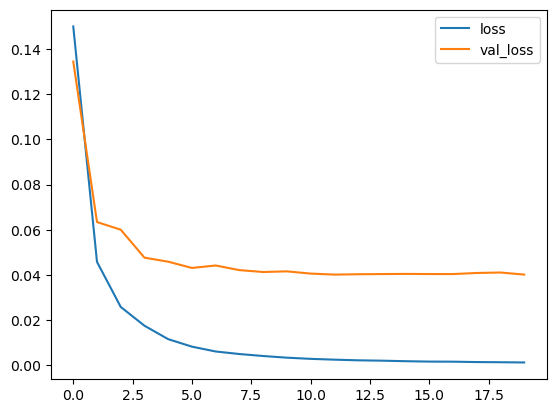

In [21]:
metrics[['loss','val_loss']].plot()

<Axes: >

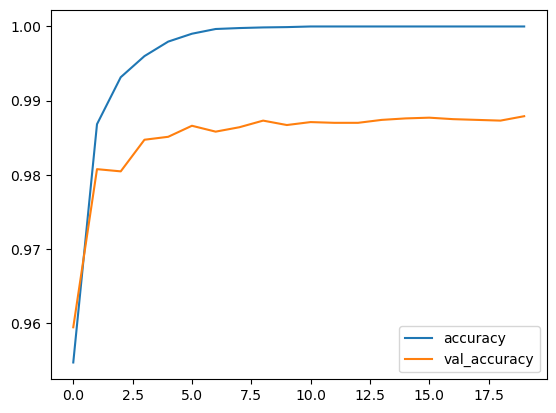

In [22]:
metrics[['accuracy', 'val_accuracy']].plot()

In [23]:
model.save("model/mnist_cnn.h5")

In [24]:
from keras.models import load_model
model= load_model("model/mnist_cnn.h5")

# Predict on Test Data

In [25]:
y_pred = model.predict(x_test_reshaped)

263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [26]:
y_pred = np.argmax(y_pred, axis=1)

# Model Evaluation

In [27]:
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score,classification_report

In [28]:
print("Model's acuracy :",accuracy_score(y_pred,y_test))
print("Recall-Score :",recall_score(y_pred,y_test,average="macro"))
print("Precision-Score :",precision_score(y_pred,y_test,average="macro"))
print("F1-Score :",f1_score(y_pred,y_test,average="macro"))

Model's acuracy : 0.9877380952380952
Recall-Score : 0.9876117010405656
Precision-Score : 0.9876464999567964
F1-Score : 0.9876200520971306


In [29]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       848
           1       0.99      0.99      0.99       924
           2       0.99      0.98      0.99       861
           3       0.99      0.99      0.99       869
           4       0.98      0.98      0.98       826
           5       0.98      0.99      0.99       764
           6       0.99      0.99      0.99       814
           7       0.99      0.99      0.99       908
           8       0.99      0.98      0.99       786
           9       0.98      0.98      0.98       800

    accuracy                           0.99      8400
   macro avg       0.99      0.99      0.99      8400
weighted avg       0.99      0.99      0.99      8400

